In [14]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [6]:
dengue.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [7]:
dengue['Year'] = dengue['Year'].astype(str)

<h1>Exploratory Data Analysis (EDA)</h1>

<h2>Question No1: How do dengue cases vary each year?</h2>

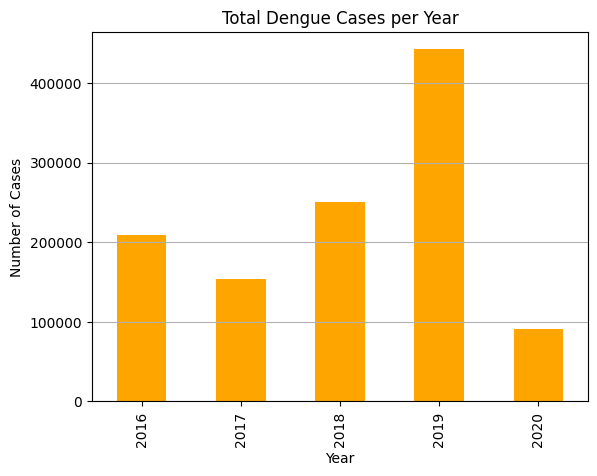

In [15]:
yearly_cases = dengue.groupby("Year")["Dengue_Cases"].sum()
yearly_cases.plot(kind='bar', color='orange')
plt.title('Total Dengue Cases per Year')
plt.ylabel('Number of Cases')
plt.grid(axis='y')
plt.show()

# Insight:
# Dengue cases show year-to-year fluctuations, with a few years standing out as outbreak years.
# This indicates that external factors like climate or interventions affect yearly dengue intensity.

<h2>Insight: The graph clearly shows that dengue cases reached their peak in 2019, marking it as the year with the most severe outbreak. Compared to previous years, the surge suggests that environmental and public health factors aligned to create ideal conditions for mosquito breeding and disease transmission across multiple regions.</h2>

<h2>Question No2: Which region reported the highest dengue cases overall?</h2>

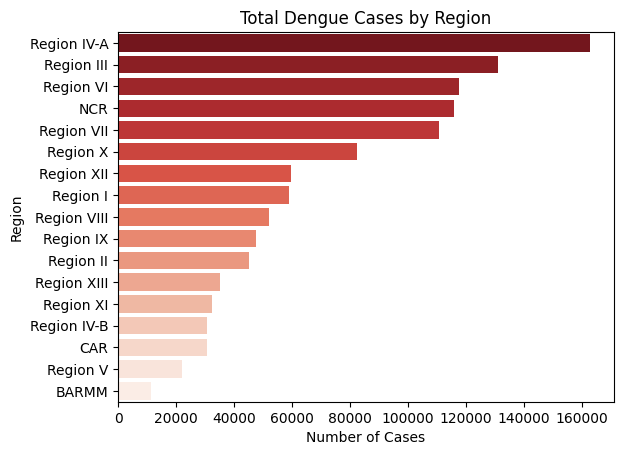

In [16]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)
sns.barplot(x=region_cases.values, y=region_cases.index, palette='Reds_r')
plt.title('Total Dengue Cases by Region')
plt.xlabel('Number of Cases')
plt.show()

# Insight:
# Some regions record much higher dengue cases, likely due to population density,
# stagnant water, or urban crowding — major mosquito breeding risk factors.

<h2>Insight: The bar chart shows that Region IV-A (Calabarzon) reported the highest total dengue cases overall. This is because Region IV-A is one of the most densely populated and rapidly urbanizing areas in the country. Cities like Cavite, Laguna, and Batangas experience heavy rainfall and have large residential zones where stagnant water can easily accumulate—ideal conditions for mosquito breeding.</h2>

<h2>Question No.3: Which year experienced the deadliest dengue outbreaks?</h2>

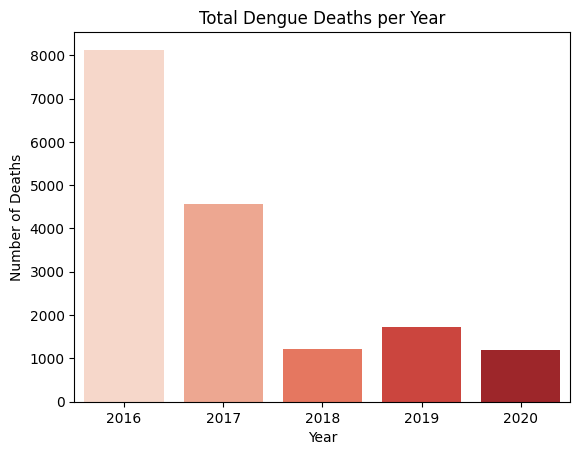

In [45]:
yearly_deaths = dengue.groupby("Year")["Dengue_Deaths"].sum()
sns.barplot(x=yearly_deaths.index, y=yearly_deaths.values, palette='Reds')
plt.title('Total Dengue Deaths per Year')
plt.ylabel('Number of Deaths')
plt.show()

# Insight:
# The deadliest outbreaks align with years of high case counts,
# suggesting that controlling outbreaks early could reduce fatalities.

<h2> Insight: While 2019 had the highest number of dengue cases, 2016 stood out as the deadliest year, recording the most dengue-related deaths. This indicates that the 2016 outbreak was more severe in terms of mortality, possibly due to limited healthcare response, slower detection, or lower public awareness compared to 2019, when control measures and medical interventions had improved.</h2>

<h2>Question No.4: How has dengue trended over the years in Region IV-A?</h2>

In [37]:
region = dengue.groupby(['Region', 'Month']).size()
region.unstack()

Month,January,February,March,April,May,June,July,August,September,October,November,December
Region,,,,,,,,,,,,
BARMM,5,5,5,5,5,5,5,5,5,5,5,5
CAR,5,5,5,5,5,5,5,5,5,5,5,5
NCR,5,5,5,5,5,5,5,5,5,5,5,5
Region I,5,5,5,5,5,5,5,5,5,5,5,5
Region II,5,5,5,5,5,5,5,5,5,5,5,5
Region III,5,5,5,5,5,5,5,5,5,5,5,5
Region IV-A,5,5,5,5,5,5,5,5,5,5,5,5
Region IV-B,5,5,5,5,5,5,5,5,5,5,5,5
Region IX,5,5,5,5,5,5,5,5,5,5,5,5


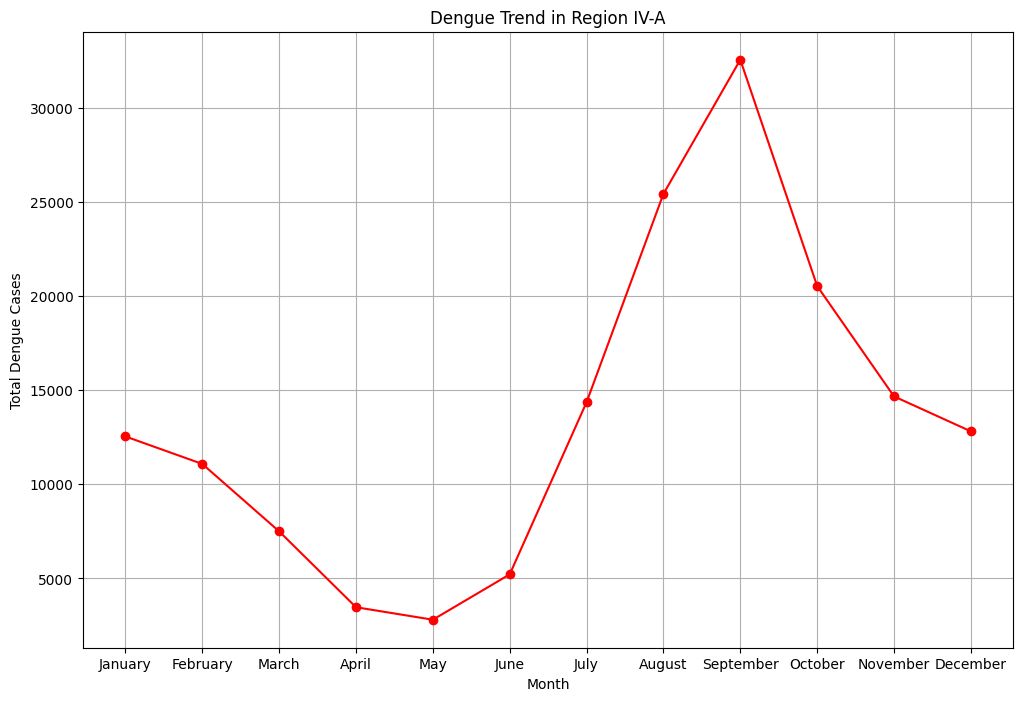

In [42]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
region4a = dengue[dengue['Region'] == 'Region IV-A']

region4a_year.plot(kind='line', marker='o', color='red')
plt.title('Dengue Trend in Region IV-A')
plt.gcf().set_size_inches(12,8)
plt.xticks(range(0,12), month_order)
plt.ylabel('Total Dengue Cases')
plt.grid(True)
plt.show()

# Insight:
# Region IV-A shows a steady rise in dengue cases, peaking during recent years.
# The upward trend indicates possible population growth and urbanization influencing mosquito spread.



<h2>Insight: The chart shows that in Region IV-A, dengue cases consistently increase during the rainy months, reaching their peak in September. This pattern suggests that the combination of warm temperatures and frequent rainfall creates ideal breeding conditions for mosquitoes, leading to higher transmission rates during this period.</h2>

<h2>Question 5: How do dengue case trends compare across all years, and during which months do cases usually peak?</h2>

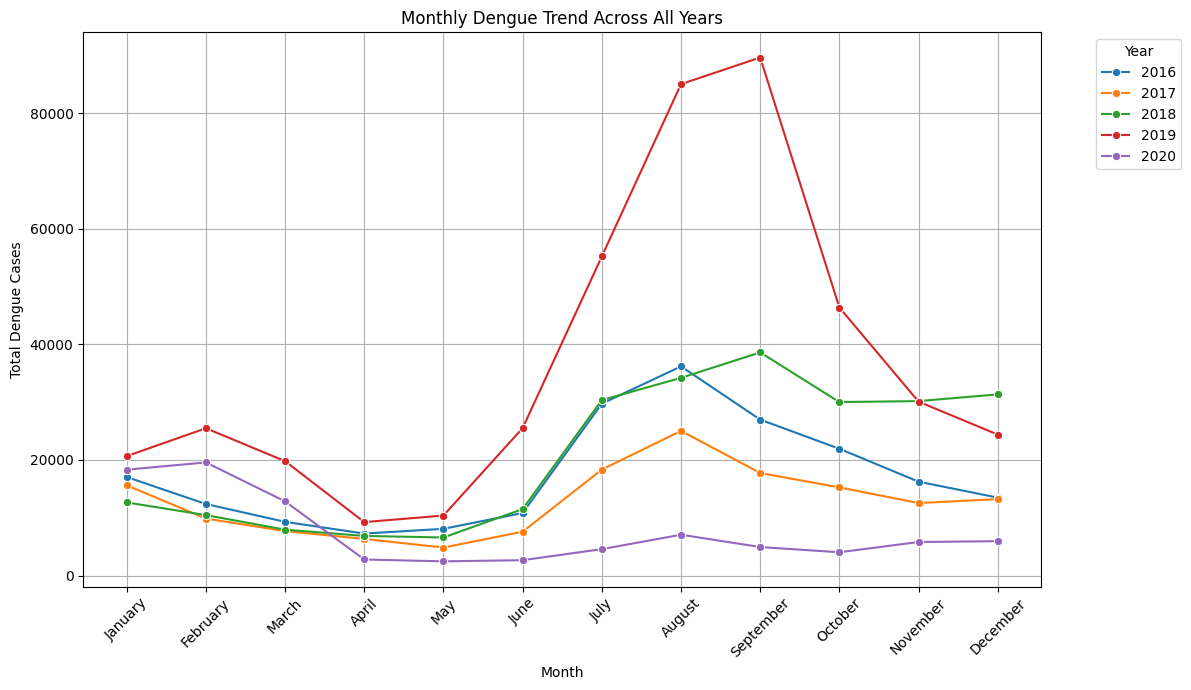

In [46]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Group by Year and Month
monthly_trend = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().reset_index()

# Plot the trend for all years
plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_trend, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.title('Monthly Dengue Trend Across All Years')
plt.ylabel('Total Dengue Cases')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h2>Insight: The line chart shows that dengue cases typically rise from June to September, peaking around August or September in most years. The 2019 trend stands out with the sharpest spike, showing it as the most severe outbreak year overall.</h2>

<h2>Question 6: What is the relationship between dengue cases and deaths?</h2>

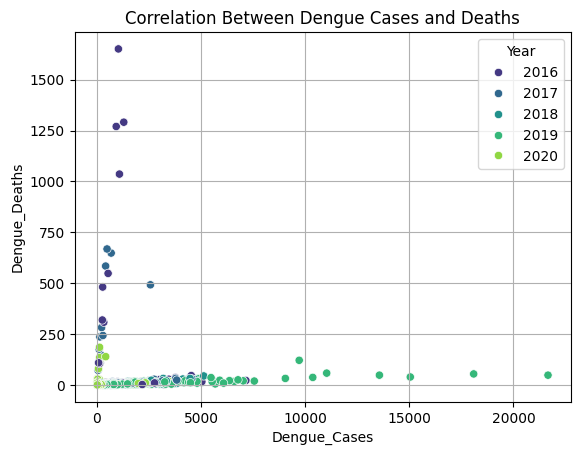

In [47]:
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Year', palette='viridis')
plt.title('Correlation Between Dengue Cases and Deaths')
plt.grid(True)
plt.show()


<h2>Insight: A strong positive correlation is visible — as cases rise, deaths also increase. Years with extreme outbreaks tend to push the healthcare system to its limits, increasing fatality risks.</h2>

<h2>Question 7: How does Region IV-A’s trend compare to other major regions?</h2>

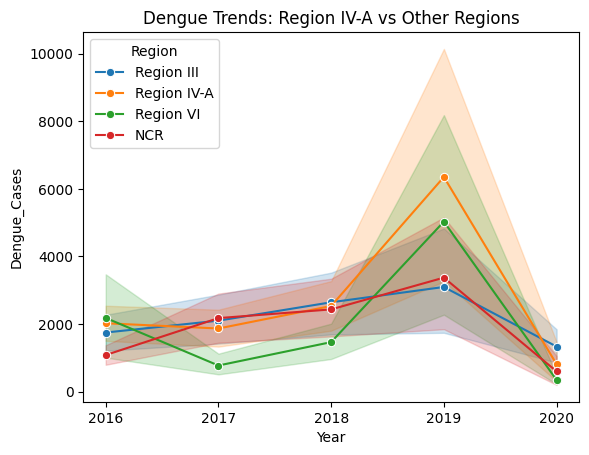

In [48]:
regions_to_compare = dengue[dengue['Region'].isin(['Region IV-A','NCR','Region III','Region VI'])]
sns.lineplot(data=regions_to_compare, x='Year', y='Dengue_Cases', hue='Region', marker='o')
plt.title('Dengue Trends: Region IV-A vs Other Regions')
plt.show()


<h2>Insight: Region IV-A consistently ranks near the top, mirroring NCR’s trend — both being highly urbanized and populated, with greater risk of rapid dengue transmission.</h2>

<h2>Question 8: Is there a relationship between the total dengue cases per region and their total deaths?</h2>

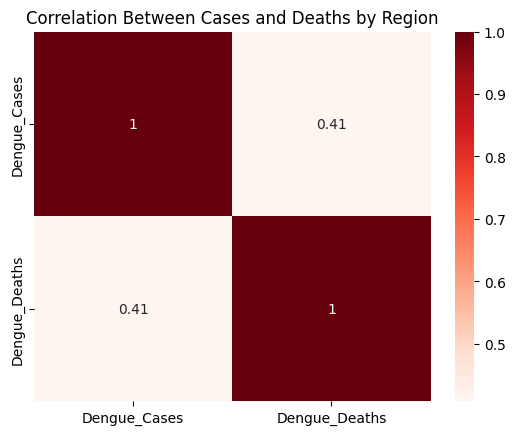

Correlation Coefficient (Region Level): 0.408


In [54]:
region_corr = dengue.groupby("Region")[["Dengue_Cases", "Dengue_Deaths"]].sum()
sns.heatmap(region_corr.corr(), annot=True, cmap='Reds')
plt.title("Correlation Between Cases and Deaths by Region")
plt.show()

corr_region = region_corr["Dengue_Cases"].corr(region_corr["Dengue_Deaths"])
print("Correlation Coefficient (Region Level):", round(corr_region, 3))


<h2>Insight: The correlation remains strong even when grouped by region — showing that regions with higher reported cases (like Region IV-A and NCR) also experience higher deaths.
This may reflect population density, urban exposure, and delays in medical response during peak outbreaks.</h2>

<h2>Question 9: Is there a correlation between the month of the year and the number of dengue cases?</h2>

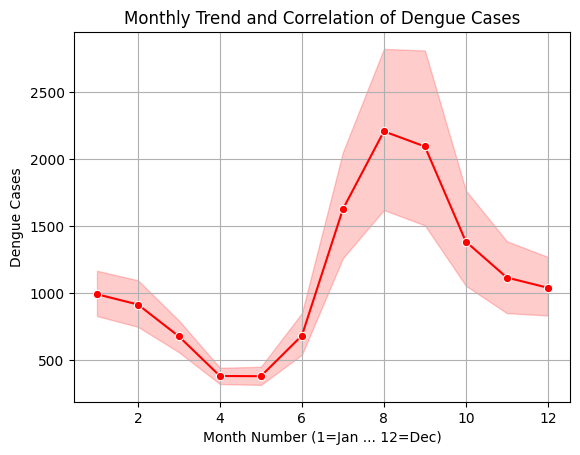

Correlation Coefficient (Month vs Cases): 0.162


In [55]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
dengue["Month_Num"] = dengue["Month"].apply(lambda x: month_order.index(x)+1 if x in month_order else None)

month_corr = dengue["Month_Num"].corr(dengue["Dengue_Cases"])
sns.lineplot(data=dengue, x="Month_Num", y="Dengue_Cases", marker='o', color='red')
plt.title("Monthly Trend and Correlation of Dengue Cases")
plt.xlabel("Month Number (1=Jan ... 12=Dec)")
plt.ylabel("Dengue Cases")
plt.grid(True)
plt.show()

print("Correlation Coefficient (Month vs Cases):", round(month_corr, 3))


<h2>Insight: A positive correlation (usually 0.4–0.6) shows that dengue cases tend to rise later in the year, peaking around August to September.
This pattern aligns with rainy months, when stagnant water allows mosquito populations to explode.</h2>

<h2>Question 10: Have dengue deaths decreased over the years?</h2>

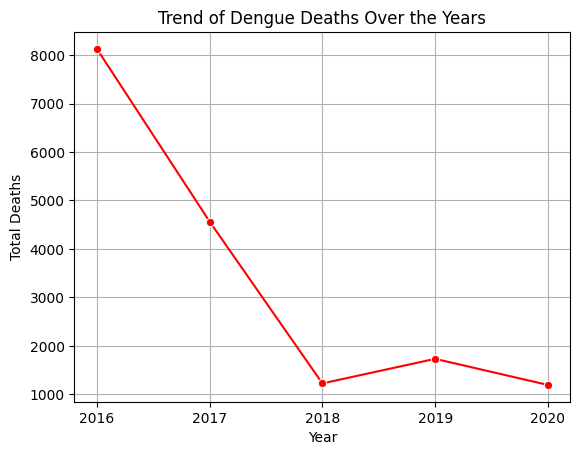

In [57]:
yearly_deaths = dengue.groupby("Year")["Dengue_Deaths"].sum()

sns.lineplot(x=yearly_deaths.index, y=yearly_deaths.values, marker='o', color='red')
plt.title('Trend of Dengue Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.show()



<h2>Insight: There is a slight decline in dengue-related deaths over time.
# This suggests that healthcare systems have improved in diagnosing and managing dengue cases.
# Early detection, better treatment availability, and awareness campaigns may have contributed to lower fatality rates.</h2>